## Task One
### Can we categorize we the films by type, such as animated or not by using the crew's job titles?

### Seperating the movies into all jobs found in animated movies and non animated movies and using logistic regression for modelling


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use(style="seaborn")
%matplotlib inline

In [2]:
df_movie = pd.read_csv("../input/tmdb-movie-metadata/tmdb_5000_movies.csv")
df_credit = pd.read_csv("../input/tmdb-movie-metadata/tmdb_5000_credits.csv")

In [3]:
def extract_feature(x, field='name'):
    """
    function is intended to convert string
    json and extract values of a specified field
    as a list...
    """
    x = ast.literal_eval(x)
    return [i[field].lower() for i in x]

def find_animation(x):
    '''
    Search for animation genre and label it as '1' for
    animation and '0' for non - animation
    '''
    for i in x:
        if i.lower() == 'animation':
            return 1
    return 0

# Preprocessing

In [4]:
df_movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
#  checking length of both dataframes
len(df_movie),len(df_credit)

(4803, 4803)

In [6]:
# Extracting genres
df_movie['list_genres'] = df_movie['genres'].apply(extract_feature)
df_movie['list_genres']

0       [action, adventure, fantasy, science fiction]
1                        [adventure, fantasy, action]
2                          [action, adventure, crime]
3                    [action, crime, drama, thriller]
4                [action, adventure, science fiction]
                            ...                      
4798                        [action, crime, thriller]
4799                                [comedy, romance]
4800               [comedy, drama, romance, tv movie]
4801                                               []
4802                                    [documentary]
Name: list_genres, Length: 4803, dtype: object

In [7]:
# Extracting animated movies
df_movie['animated'] = df_movie['list_genres'].apply(find_animation)

In [8]:
df_movie.head(4).T

,0,1,2,3
budget,237000000,300000000,245000000,250000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/,http://www.thedarkknightrises.com/
id,19995,285,206647,49026
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,..."
original_language,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...
popularity,150.438,139.083,107.377,112.313
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""..."


In [9]:
# Selecting revelant columns
df_movie = df_movie[['id', 'original_title','list_genres','animated']]
df_movie.head()

,id,original_title,list_genres,animated
0,19995,Avatar,"[action, adventure, fantasy, science fiction]",0
1,285,Pirates of the Caribbean: At World's End,"[adventure, fantasy, action]",0
2,206647,Spectre,"[action, adventure, crime]",0
3,49026,The Dark Knight Rises,"[action, crime, drama, thriller]",0
4,49529,John Carter,"[action, adventure, science fiction]",0


In [10]:
df_credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [11]:
# Extracting all job roles for each movie
df_credit['alljobs'] = df_credit['crew'].apply(extract_feature,field = 'job')
df_credit.head()

,movie_id,title,cast,crew,alljobs
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[editor, production design, sound designer, su..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[director of photography, director, producer, ..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[original music composer, director, set decora..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[original music composer, producer, screenplay..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[screenplay, director, thanks, producer, casti..."


In [12]:
# Merge movie and credit dataframes
df = pd.merge(df_movie, df_credit,left_on='id', right_on='movie_id')
df.head()

,id,original_title,list_genres,animated,movie_id,title,cast,crew,alljobs
0,19995,Avatar,"[action, adventure, fantasy, science fiction]",0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[editor, production design, sound designer, su..."
1,285,Pirates of the Caribbean: At World's End,"[adventure, fantasy, action]",0,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[director of photography, director, producer, ..."
2,206647,Spectre,"[action, adventure, crime]",0,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[original music composer, director, set decora..."
3,49026,The Dark Knight Rises,"[action, crime, drama, thriller]",0,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[original music composer, producer, screenplay..."
4,49529,John Carter,"[action, adventure, science fiction]",0,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[screenplay, director, thanks, producer, casti..."


In [13]:
# selecting useful features
df = df[['title','list_genres','animated','alljobs']]
df.head()

,title,list_genres,animated,alljobs
0,Avatar,"[action, adventure, fantasy, science fiction]",0,"[editor, production design, sound designer, su..."
1,Pirates of the Caribbean: At World's End,"[adventure, fantasy, action]",0,"[director of photography, director, producer, ..."
2,Spectre,"[action, adventure, crime]",0,"[original music composer, director, set decora..."
3,The Dark Knight Rises,"[action, crime, drama, thriller]",0,"[original music composer, producer, screenplay..."
4,John Carter,"[action, adventure, science fiction]",0,"[screenplay, director, thanks, producer, casti..."


Below we can see the are 234 animated movies and 4569 non animated movies

In [14]:
df['animated'].value_counts()

0    4569
1     234
Name: animated, dtype: int64

In [15]:
# save df
# df.to_csv('taskone.csv',index=False)

In [16]:
# Total number of unique jobs across all movies
jobs = []
for i in df['alljobs']:
    for j in i:
        jobs.append(j.lower())
total_jobs = len(set(jobs))
print('There are',total_jobs,'different jobs in this dataset')
jobs = list(set(jobs))
jobs = [x for x in jobs]
mjobs =jobs
# print(jobs)

There are 417 different jobs in this dataset


In [17]:
# Seperate animated movies and non-animated movies into different dataframes
animated= df.groupby('animated').get_group(1).reset_index(drop=True)
others = df.groupby('animated').get_group(0).reset_index(drop=True)

In [18]:
animated_copy = animated.copy()
non_animated_copy = others.copy()

In [19]:
# total list of crews job titles in animated movies
animated_jobs = []
for i in animated['alljobs']:
    for j in i:
        animated_jobs.append(j.lower())
total_ajobs = (len(set(animated_jobs)))
print('There are',total_ajobs,'job titles for animated movies')
ajobs = list(set(animated_jobs))

There are 278 job titles for animated movies


In [20]:
# total list of crews job titles in non-animated movies
other_jobs = []
for i in others['alljobs']:
    for j in i:
        other_jobs.append(j.lower())
total_ojobs = (len(set(other_jobs)))
print('There are',total_ojobs,'job titles for non-animated movies')
ojobs = list(set(other_jobs))

There are 401 job titles for non-animated movies


In [21]:
# jobs common to both animated movies and non animated movies
common_jobs = set.intersection(set(ojobs),set(ajobs))
total_comm_jobs  = len(set(common_jobs))
print('There are',total_comm_jobs,'job titles common to both animated and non_animated movies')
# print(common_jobs)

There are 262 job titles common to both animated and non_animated movies


In [22]:
# Check for each of the 278 animated job titles in 'alljobs' column for each movie
job_count = []
animation_jobs = []
for k in animated_copy['alljobs']:
    k = list(set(k))
    ujobs= [j for j in ajobs if j in k]
    job_count.append(len(ujobs))
    animation_jobs.append(ujobs)
# print(k)
animated_copy['animation_jobs'] = animation_jobs
animated_copy['animation_job_count']= job_count
animated_copy.head()

,title,list_genres,animated,alljobs,animation_jobs,animation_job_count
0,Tangled,"[animation, family]",1,"[executive producer, novel, novel, animation s...","[layout, co-art director, supervising animator...",32
1,Monsters University,"[animation, family]",1,"[executive producer, executive producer, execu...","[director, original music composer, executive ...",7
2,Cars 2,"[animation, family, adventure, comedy]",1,"[director, original story, production design, ...","[supervising animator, director, original stor...",29
3,Toy Story 3,"[animation, family, comedy]",1,"[story, director, story, producer, story, than...","[layout, sound effects editor, director, addit...",24
4,The Good Dinosaur,"[adventure, animation, family]",1,"[story, producer, original music composer, ori...","[director, original music composer, story, pro...",5


In [23]:
# however note that some job titles in the 'animationjobs' column also exist in 'other_jobs'(non_animation)
len(set.intersection(set(ajobs),set(ojobs)))

262

In [24]:
com_df = df.copy()
# Check for each of these common job titles for each movie
job_count = []
com_jobs = []
for k in com_df['alljobs']:
    k = list(set(k))
    cjobs= [j for j in common_jobs if j  in k]
    job_count.append(len(cjobs))
    com_jobs.append(cjobs)
    
com_df['common_jobs'] = com_jobs
com_df['common_job_count']= job_count
com_df.head()

,title,list_genres,animated,alljobs,common_jobs,common_job_count
0,Avatar,"[action, adventure, fantasy, science fiction]",0,"[editor, production design, sound designer, su...","[dialogue editor, supervising sound editor, se...",57
1,Pirates of the Caribbean: At World's End,"[adventure, fantasy, action]",0,"[director of photography, director, producer, ...","[stunts, director, editor, music editor, art d...",20
2,Spectre,"[action, adventure, crime]",0,"[original music composer, director, set decora...","[dialogue editor, supervising sound editor, se...",55
3,The Dark Knight Rises,"[action, crime, drama, thriller]",0,"[original music composer, producer, screenplay...","[dialogue editor, supervising sound editor, se...",78
4,John Carter,"[action, adventure, science fiction]",0,"[screenplay, director, thanks, producer, casti...","[dialogue editor, supervising sound editor, ad...",62


In [25]:
df['animated'].value_counts()

0    4569
1     234
Name: animated, dtype: int64

In [26]:
# Check for each of these unique non animation job titles for each movie
# Check for each of the 401 non animated job titles in 'alljobs' for each movie

job_count = []
non_animation_jobs = []
for k in non_animated_copy['alljobs']:
    k = list(set(k))
    ujobs= [j for j in ojobs if j in k]
    job_count.append(len(ujobs))
    non_animation_jobs.append(ujobs)
    
non_animated_copy['non_animation_jobs'] = non_animation_jobs
non_animated_copy['non_animation_job_count']= job_count
non_animated_copy.head()

,title,list_genres,animated,alljobs,non_animation_jobs,non_animation_job_count
0,Avatar,"[action, adventure, fantasy, science fiction]",0,"[editor, production design, sound designer, su...","[set costumer, construction coordinator, stunt...",57
1,Pirates of the Caribbean: At World's End,"[adventure, fantasy, action]",0,"[director of photography, director, producer, ...","[stunts, director, art direction, set decorati...",20
2,Spectre,"[action, adventure, crime]",0,"[original music composer, director, set decora...","[set costumer, director, property master, adr ...",62
3,The Dark Knight Rises,"[action, crime, drama, thriller]",0,"[original music composer, producer, screenplay...","[set costumer, construction coordinator, stunt...",87
4,John Carter,"[action, adventure, science fiction]",0,"[screenplay, director, thanks, producer, casti...","[stunts, production supervisor, director, prop...",65


Text(0, 0.5, 'number of animated movies')

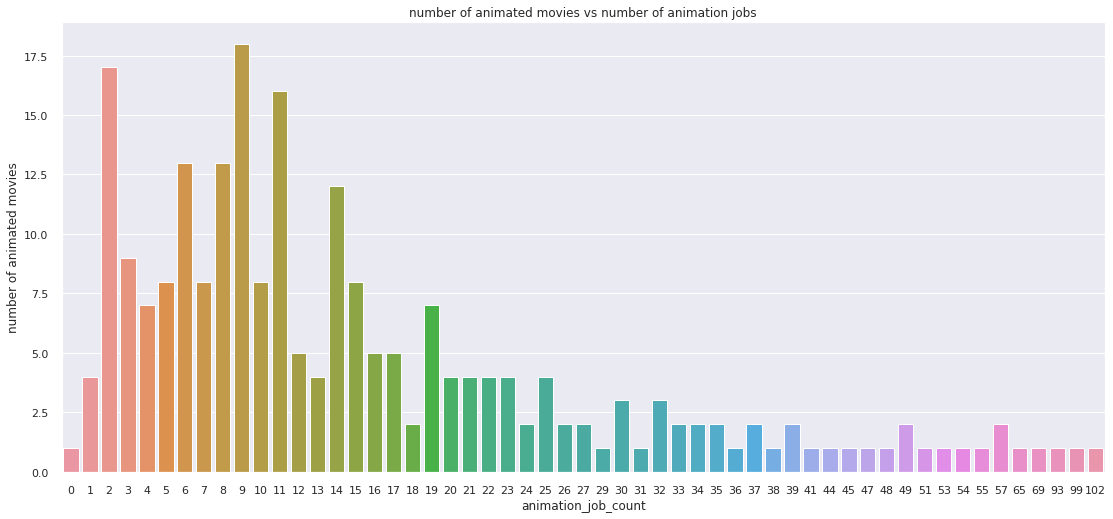

In [27]:
sns.set(rc={'figure.figsize':(18.7,8.27)})
ax = sns.countplot(x = 'animation_job_count',
            data = animated_copy)
ax.set_title('number of animated movies vs number of animation jobs')
ax.set_ylabel('number of animated movies')

From the figure above, no animated movie made use of the 238 jobs titles, the max number used was 102. its obvious that most animated movies needs at least 102jobs.

# Modelling

In [28]:
# preview of concatenation - obviously, NAN values appear for non animation
# jobs column for animated movies and vice versa

adf = animated_copy[['title','animated','animation_jobs','animation_job_count']].head(3)
nadf = non_animated_copy[['title','animated','non_animation_jobs','non_animation_job_count']].head(3)
df = pd.concat([adf,nadf], keys=['title', 'animated', 'animation_jobs','non_animation_jobs'])
df.head(6)

title  animated  \
title    0                                   Tangled         1   
         1                       Monsters University         1   
         2                                    Cars 2         1   
animated 0                                    Avatar         0   
         1  Pirates of the Caribbean: At World's End         0   
         2                                   Spectre         0   

                                               animation_jobs  \
title    0  [layout, co-art director, supervising animator...   
         1  [director, original music composer, executive ...   
         2  [supervising animator, director, original stor...   
animated 0                                                NaN   
         1                                                NaN   
         2                                                NaN   

            animation_job_count  \
title    0                 32.0   
         1                  7.0   
         2                 29.0   
animated 0                  NaN   
         1                  NaN   
         2                  NaN   

                                           non_animation_jobs  \
title    0                                                NaN   
         1                                                NaN   
         2                                                NaN   
animated 0  [set costumer, construction coordinator, stunt...   
         1  [stunts, director, art direction, set decorati...   
         2  [set costumer, director, property master, adr ...   

            non_animation_job_count  
title    0                      NaN  
         1                      NaN  
         2                      NaN  
animated 0                     57.0  
         1                     20.0  
         2                     62.0

In [29]:
adf = animated_copy[['title','animated','animation_jobs','animation_job_count']]
nadf = non_animated_copy[['title','animated','non_animation_jobs','non_animation_job_count']]
df = pd.concat([adf,nadf], keys=['title', 'animated', 'animation_jobs','non_animation_jobs'])
df

title  animated  \
title    0                       Tangled         1   
         1           Monsters University         1   
         2                        Cars 2         1   
         3                   Toy Story 3         1   
         4             The Good Dinosaur         1   
...                                  ...       ...   
animated 4564                El Mariachi         0   
         4565                  Newlyweds         0   
         4566  Signed, Sealed, Delivered         0   
         4567           Shanghai Calling         0   
         4568          My Date with Drew         0   

                                                  animation_jobs  \
title    0     [layout, co-art director, supervising animator...   
         1     [director, original music composer, executive ...   
         2     [supervising animator, director, original stor...   
         3     [layout, sound effects editor, director, addit...   
         4     [director, original music composer, story, pro...   
...                                                          ...   
animated 4564                                                NaN   
         4565                                                NaN   
         4566                                                NaN   
         4567                                                NaN   
         4568                                                NaN   

               animation_job_count  \
title    0                    32.0   
         1                     7.0   
         2                    29.0   
         3                    24.0   
         4                     5.0   
...                            ...   
animated 4564                  NaN   
         4565                  NaN   
         4566                  NaN   
         4567                  NaN   
         4568                  NaN   

                                              non_animation_jobs  \
title    0                                                   NaN   
         1                                                   NaN   
         2                                                   NaN   
         3                                                   NaN   
         4                                                   NaN   
...                                                          ...   
animated 4564  [director, music, director of photography, aut...   
         4565  [director, writer, music, cinematography, edit...   
         4566  [director, writer, costume design, production ...   
         4567                                 [director, writer]   
         4568                     [director, executive producer]   

               non_animation_job_count  
title    0                         NaN  
         1                         NaN  
         2                         NaN  
         3                         NaN  
         4                         NaN  
...                                ...  
animated 4564                      6.0  
         4565                      6.0  
         4566                     10.0  
         4567                      2.0  
         4568                      2.0  

[4803 rows x 6 columns]

In [30]:
print(df['animated'].value_counts())

0    4569
1     234
Name: animated, dtype: int64


In [31]:
#one hot encode the job titles
df = df.fillna(0)

#For every row in the dataframe, iterate through the list of animation jobs and place a 1 into the corresponding column
try:
    for index, row in df.iterrows():
        for jobs in row['animation_jobs']:
            df.loc[index, jobs] = 1
    df = df.fillna(0)
except TypeError:
    print(index,jobs)    
df

('animated', 0) writer


title  animated  \
title    0                       Tangled         1   
         1           Monsters University         1   
         2                        Cars 2         1   
         3                   Toy Story 3         1   
         4             The Good Dinosaur         1   
...                                  ...       ...   
animated 4564                El Mariachi         0   
         4565                  Newlyweds         0   
         4566  Signed, Sealed, Delivered         0   
         4567           Shanghai Calling         0   
         4568          My Date with Drew         0   

                                                  animation_jobs  \
title    0     [layout, co-art director, supervising animator...   
         1     [director, original music composer, executive ...   
         2     [supervising animator, director, original stor...   
         3     [layout, sound effects editor, director, addit...   
         4     [director, original music composer, story, pro...   
...                                                          ...   
animated 4564                                                  0   
         4565                                                  0   
         4566                                                  0   
         4567                                                  0   
         4568                                                  0   

               animation_job_count  \
title    0                    32.0   
         1                     7.0   
         2                    29.0   
         3                    24.0   
         4                     5.0   
...                            ...   
animated 4564                  0.0   
         4565                  0.0   
         4566                  0.0   
         4567                  0.0   
         4568                  0.0   

                                              non_animation_jobs  \
title    0                                                     0   
         1                                                     0   
         2                                                     0   
         3                                                     0   
         4                                                     0   
...                                                          ...   
animated 4564  [director, music, director of photography, aut...   
         4565  [director, writer, music, cinematography, edit...   
         4566  [director, writer, costume design, production ...   
         4567                                 [director, writer]   
         4568                     [director, executive producer]   

               non_animation_job_count  layout  co-art director  \
title    0                         0.0     1.0              1.0   
         1                         0.0     NaN              NaN   
         2                         0.0     NaN              NaN   
         3                         0.0     1.0              NaN   
         4                         0.0     NaN              NaN   
...                                ...     ...              ...   
animated 4564                      6.0     NaN              NaN   
         4565                      6.0     NaN              NaN   
         4566                     10.0     NaN              NaN   
         4567                      2.0     NaN              NaN   
         4568                      2.0     NaN              NaN   

               supervising animator  production supervisor  ...  dialogue  \
title    0                      1.0                    1.0  ...       NaN   
         1                      NaN                    NaN  ...       NaN   
         2                      1.0                    NaN  ...       NaN   
         3                      NaN                    NaN  ...       NaN   
         4                      NaN                    NaN  ...       NaN   
...                         

In [32]:
# df.iloc[233]

In [33]:
#For every row in the dataframe, iterate through the list of non animation jobs and place a 1 into the corresponding column
try:
    for index, row in df.iloc[234:].iterrows():
        for jobs in row['non_animation_jobs']:
            df.loc[index, jobs] = 1
        df = df.fillna(0)
except TypeError:
    print(index,jobs)
    pass
    
df

title  animated  \
title    0                       Tangled         1   
         1           Monsters University         1   
         2                        Cars 2         1   
         3                   Toy Story 3         1   
         4             The Good Dinosaur         1   
...                                  ...       ...   
animated 4564                El Mariachi         0   
         4565                  Newlyweds         0   
         4566  Signed, Sealed, Delivered         0   
         4567           Shanghai Calling         0   
         4568          My Date with Drew         0   

                                                  animation_jobs  \
title    0     [layout, co-art director, supervising animator...   
         1     [director, original music composer, executive ...   
         2     [supervising animator, director, original stor...   
         3     [layout, sound effects editor, director, addit...   
         4     [director, original music composer, story, pro...   
...                                                          ...   
animated 4564                                                  0   
         4565                                                  0   
         4566                                                  0   
         4567                                                  0   
         4568                                                  0   

               animation_job_count  \
title    0                    32.0   
         1                     7.0   
         2                    29.0   
         3                    24.0   
         4                     5.0   
...                            ...   
animated 4564                  0.0   
         4565                  0.0   
         4566                  0.0   
         4567                  0.0   
         4568                  0.0   

                                              non_animation_jobs  \
title    0                                                     0   
         1                                                     0   
         2                                                     0   
         3                                                     0   
         4                                                     0   
...                                                          ...   
animated 4564  [director, music, director of photography, aut...   
         4565  [director, writer, music, cinematography, edit...   
         4566  [director, writer, costume design, production ...   
         4567                                 [director, writer]   
         4568                     [director, executive producer]   

               non_animation_job_count  layout  co-art director  \
title    0                         0.0     1.0              1.0   
         1                         0.0     0.0              0.0   
         2                         0.0     0.0              0.0   
         3                         0.0     1.0              0.0   
         4                         0.0     0.0              0.0   
...                                ...     ...              ...   
animated 4564                      6.0     0.0              0.0   
         4565                      6.0     0.0              0.0   
         4566                     10.0     0.0              0.0   
         4567                      2.0     0.0              0.0   
         4568                      2.0     0.0              0.0   

               supervising animator  production supervisor  ...  tattooist  \
title    0                      1.0                    1.0  ...        0.0   
         1                      0.0                    0.0  ...        0.0   
         2                      1.0                    0.0  ...        0.0   
         3                      0.0                    0.0  ...        0.0   
         4                      0.0                    0.0  ...        0.0   
...                   

In [34]:
train_df = df.iloc[:,6:].reset_index(drop=True)
train_df.head()

,layout,co-art director,supervising animator,production supervisor,technical supervisor,director,characters,post production supervisor,visual effects supervisor,software engineer,...,tattooist,post production consulting,co-writer,prosthetic designer,sound montage associate,radio play,mechanical & creature designer,interior designer,imaging science,settings
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
x = train_df
y = df[['animated']].reset_index(drop=True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x,np.ravel(y) , test_size=0.30, random_state=1)

lreg = LogisticRegression(C=10,max_iter = 2000)
clf=lreg.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Accuracy {:.2f}'.format(clf.score(x_test, y_test)))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) 

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

Accuracy 0.97
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1373
           1       0.84      0.54      0.66        68

    accuracy                           0.97      1441
   macro avg       0.91      0.77      0.82      1441
weighted avg       0.97      0.97      0.97      1441



In [36]:
print(confusion_matrix)

[[1498   18]
 [  24   45]]


In [37]:
# Predict new values, change all job titles to 1 and fill the remaining values with 0 to make it 417
predi = non_animated_copy.copy()
val = predi['alljobs'][2]
# val
testdf = pd.DataFrame()
for i in mjobs:
    testdf.loc[0,f'{i}'] = 0

for i in set(val):
    testdf.loc[0, f'{i}'] = 1
    
clf.predict(testdf)[0]

0

recall 0 is for non_animated and 1 is for animated movies

Text(0.5, 1.0, 'Logistic regression classification report')

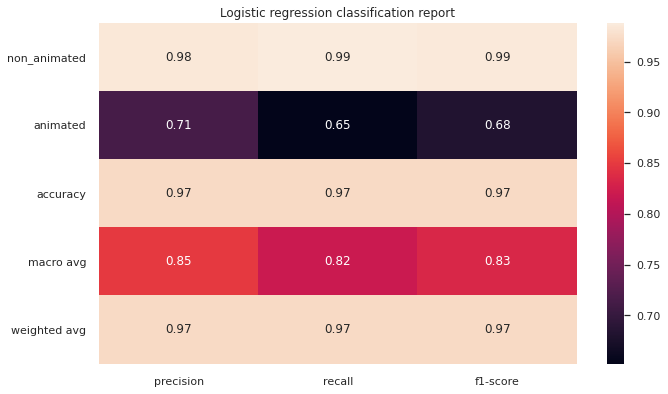

In [38]:
sns.set(rc={'figure.figsize':(10.7,6.27)})

clf_report = classification_report(y_test,
                                   y_pred,
                                   labels=[0,1],
                                   target_names=['non_animated','animated'],
                                   output_dict=True)

clf_plot =sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
clf_plot.set_title('Logistic regression classification report')


In [39]:
clf_plot = clf_plot.get_figure()

clf_plot.savefig("log_reg_clf_rep.png")